In [ ]:
# with rotated images like horizontally flip, contrast and zoom, it is possible for cnn that it could not perform better


In [88]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from keras.models import Sequential  # importing sequential model for training
from keras.layers.core import Dense,Dropout,Activation, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractionsfrom keras.layers import Dense, Conv2D, Flatten # layers importing for the CNN featueres extractions
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 189s 1us/step


In [8]:
list(data_dir.glob('*/*.jpg'))
# list(data_dir.glob('*/*.giff'))

In [14]:
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

In [18]:
# getting roses images
roses_images = list(data_dir.glob('roses/*'))
roses_images[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

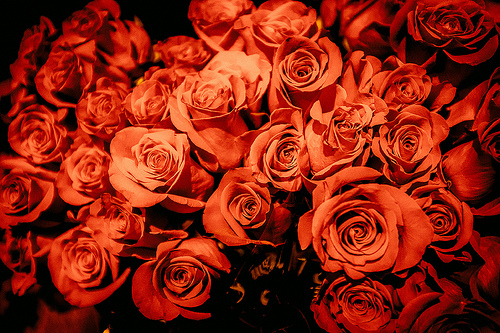

In [24]:
PIL.Image.open(str(roses_images[2]))

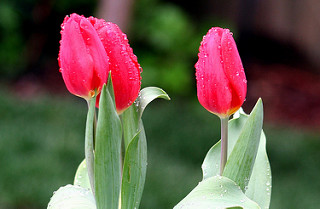

In [35]:
# Lets check on the Tulips data
tulips_images = list(data_dir.glob('tulips/*'))
tulips_images[:5]
PIL.Image.open(str(tulips_images[0]))


In [30]:
# Hardcoding the data of flowers into dictionary
flower_images_dic = {
    'roses': list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    
}

In [34]:
flower_images_dic['dandelion'][0]

WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg')

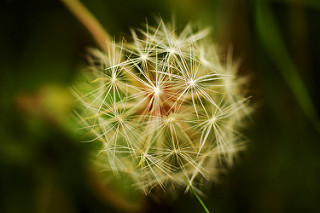

In [36]:
PIL.Image.open(str(flower_images_dic['dandelion'][0]))

In [50]:
# Assigning Labels as class no to flowers

flower_label_dic = {
    'roses': 0,
    'tulips': 1,
    'daisy': 2,
    'dandelion': 3,
    'sunflowers': 4,    
}

In [46]:
# Opening images by OPen CV
img = cv2.imread(str(flower_images_dic['dandelion'][0]))
img 
# return 3d data
img.shape

# here size is (213, 320, 3)

(213, 320, 3)

In [47]:
# coverting images into standard size images
cv2.resize(img, (180, 180)).shape
# here size converted is ((180, 180))

(180, 180, 3)

In [74]:
# Colecting data for training model

x, y = [], []
# lets check all values of data
for flower_name, images in flower_images_dic.items():
    print(flower_name)
    print(len(images))


roses
641
tulips
799
daisy
633
dandelion
898
sunflowers
699


In [2]:
# Resizing all images
for flower_name, images in flower_images_dic.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flower_label_dic[flower_name])
        


NameError: name 'flower_images_dic' is not defined

In [76]:
y[:5]

# x has 3d array 1 for x, 2 for y and 3 for RGB channel

[0, 0, 0, 0, 0]

In [81]:
# # converted into numpy array
x = np.array(x)
y= np.array(y)

In [77]:
x
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [96]:
# scaling the values
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

import gc
gc.collect()

8443

In [98]:
# applying model
num_classes = 5 # bcz we have 5 types of flowers 
model = Sequential([
    layers.Conv2D(16, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
#     Flattening the values of all conv2D layers 
    layers.Flatten(),
    layers.Dense(128, activation = 'sigmoid'), #128 is just trial and error number
    layers.Dense(num_classes) # any neuron activation is based on these 5 neuron
])

In [99]:
# compile the model
model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # when you have one hot encoding values use categorical_crossentropy otherwise sparse


In [100]:
model.fit(x_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 [==============================] - 82s 908ms/step - loss: 12.3561 - accuracy: 0.2249
Epoch 2/10
86/86 [==============================] - 90s 1s/step - loss: 12.4693 - accuracy: 0.2264
Epoch 3/10
86/86 [==============================] - 83s 958ms/step - loss: 12.4693 - accuracy: 0.2264
Epoch 4/10
86/86 [==============================] - 80s 933ms/step - loss: 12.4693 - accuracy: 0.2264
Epoch 5/10
86/86 [==============================] - 79s 913ms/step - loss: 12.4693 - accuracy: 0.2264
Epoch 6/10
86/86 [==============================] - 80s 933ms/step - loss: 12.4693 - accuracy: 0.2264
Epoch 7/10
86/86 [==============================] - 80s 935ms/step - loss: 12.4693 - accuracy: 0.2264
Epoch 8/10
86/86 [==============================] - 82s 953ms/step - loss: 12.4693 - accuracy: 0.2264
Epoch 9/10
86/86 [==============================] - 82s 957ms/step - loss: 12.4693 - accuracy: 0.2264
Epoch 10/10
86/86 [==============================] - 79s 917ms/step - loss: 12.4693 -

In [102]:

# In tutorial fit model perform with 99% accuracy and if it perform bad in  evaluate set then it is overfitting

model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 6s 218ms/step - loss: 13.0279 - accuracy: 0.1917


[13.027914047241211, 0.1917211264371872]

In [104]:
predictions= model.predict(x_test_scaled)
predictions

# zig zag values due to linear activation in dense layer with no of classes

array([[-1.6017894,  5.193154 , -1.7649406, -3.0886865, -2.358209 ],
       [-1.5745231,  5.2667093, -1.7839541, -3.0441222, -2.3268743],
       [-1.6579776,  5.1873894, -1.7533026, -3.128022 , -2.315652 ],
       ...,
       [-1.7287546,  5.0407753, -1.7781456, -3.15524  , -2.3042207],
       [-1.5214492,  5.2815886, -1.8146617, -3.016525 , -2.3512523],
       [-1.6599523,  5.1651874, -1.7396472, -3.1297977, -2.3356514]],
      dtype=float32)

In [107]:
# Converting this score into set of probability score using softmax function
score  = tf.nn.softmax(predictions[0])# first example
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.1162416e-03, 9.9715936e-01, 9.4820553e-04, 2.5235215e-04,
       5.2390108e-04], dtype=float32)>

In [109]:
# Now using argmax function for max value from probability score
np.argmax(score) # value at index 1(daisy flowers) is high

1

In [111]:
# lets check origional value
y_test[0]
# first test sample was bad so it did not worked may be due to overfitting


2

Lets use AUgmentation

In [112]:

Data_augmentation = tf.keras.layers.experimental.preprocessing.RandomZoom( 0.3 ) # .3 is value of zoom i can zoom image by any size

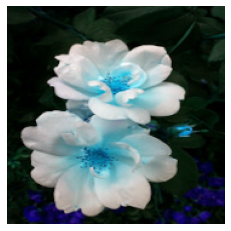

In [113]:
# plotting first image
plt.axis('off')
plt.imshow( x[0])
# daisy flower

In [114]:
Data_augmentation(x)[0] # bcz it 2D array
# It is the tranformed images

<tf.Tensor: shape=(180, 180, 3), dtype=uint8, numpy=
array([[[14, 30, 17],
        [14, 28, 16],
        [13, 27, 15],
        ...,
        [14, 37, 22],
        [18, 43, 28],
        [17, 43, 27]],

       [[16, 32, 18],
        [18, 32, 20],
        [16, 30, 18],
        ...,
        [ 7, 22, 13],
        [12, 28, 20],
        [12, 30, 18]],

       [[19, 34, 20],
        [22, 37, 23],
        [19, 34, 20],
        ...,
        [ 1,  7,  4],
        [ 0,  7,  3],
        [ 0,  8,  5]],

       ...,

       [[ 7, 16,  6],
        [ 8, 16,  6],
        [ 7, 16,  3],
        ...,
        [ 0,  6,  1],
        [ 0,  7,  0],
        [ 6, 13,  4]],

       [[ 6, 14,  7],
        [ 8, 16,  8],
        [ 6, 16,  1],
        ...,
        [ 0,  5,  2],
        [ 1,  8,  1],
        [ 8, 15,  6]],

       [[ 3, 10,  4],
        [ 7, 13,  8],
        [ 5, 16,  0],
        ...,
        [ 0,  4,  5],
        [ 1,  7,  3],
        [ 8, 15,  6]]], dtype=uint8)>

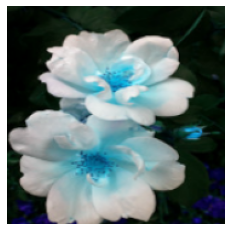

In [115]:
plt.axis('off')
# applying data_augmentation
plt.imshow( Data_augmentation(x)[0].numpy().astype('uint8')) # Converting to numpy


In [116]:
# applying random tranformation like rotation
Data_augmentation = tf.keras.layers.experimental.preprocessing.RandomRotation( 0.3 ) # .3 is value of zoom i can zoom image by any size

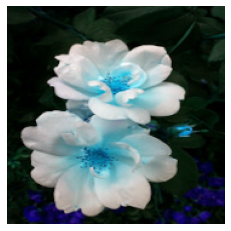

In [117]:
# plotting first image
plt.axis('off')
plt.imshow( x[0])
# daisy flower

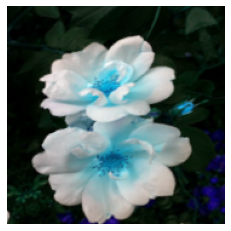

In [119]:
# AFter rotation

plt.axis('off')
# applying data_augmentation
plt.imshow( Data_augmentation(x)[0].numpy().astype('uint8')) # Converting to numpy


In [121]:
# Applying data_augmentation in model of CNN

# applying model
num_classes = 5 # bcz we have 5 types of flowers 
model = Sequential([
    Data_augmentation,
    layers.Conv2D(16, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
#     Flattening the values of all conv2D layers 
    layers.Flatten(),
    layers.Dense(128, activation = 'sigmoid'), #128 is just trial and error number
    layers.Dense(num_classes) # any neuron activation is based on these 5 neuron
])
model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) # when you have one hot encoding values use categorical_crossentropy otherwise sparse

model.fit(x_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 [==============================] - 72s 734ms/step - loss: 4.0473 - accuracy: 0.2445
Epoch 2/10
86/86 [==============================] - 61s 706ms/step - loss: 4.0499 - accuracy: 0.2464
Epoch 3/10
86/86 [==============================] - 75s 876ms/step - loss: 2.2341 - accuracy: 0.2464
Epoch 4/10
86/86 [==============================] - 91s 1s/step - loss: 1.5984 - accuracy: 0.2464
Epoch 5/10
86/86 [==============================] - 86s 1s/step - loss: 1.5983 - accuracy: 0.2464
Epoch 6/10
86/86 [==============================] - 73s 852ms/step - loss: 1.5984 - accuracy: 0.2464
Epoch 7/10
86/86 [==============================] - 72s 831ms/step - loss: 1.6002 - accuracy: 0.2464
Epoch 8/10
86/86 [==============================] - 82s 951ms/step - loss: 1.5907 - accuracy: 0.2464
Epoch 9/10
86/86 [==============================] - 93s 1s/step - loss: 1.5843 - accuracy: 0.2464
Epoch 10/10
86/86 [==============================] - 91s 1s/step - loss: 1.5765 - accuracy: 0.2464


In [122]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 7s 241ms/step - loss: 1.5660 - accuracy: 0.2397


[1.5659722089767456, 0.2396514117717743]